# Desafio sprint 3 - Análise aplicativos da google play store

## 1. Importando Bibliotecas e Lendo o Dataset

#### Vamos começar importando as bibliotecas necessárias, Pandas e Matplotlib. Em seguida, carregaremos o dataset 'googleplaystore.csv', aplicando o processamento inicial para remover as linhas duplicadas, que podem interferir nas análises futuras. Esse passo garante a consistência dos dados e elimina duplicatas que poderiam distorcer nossos resultados.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o dataset e remover linhas duplicadas
df = pd.read_csv("googleplaystore.csv")
df.drop_duplicates(subset=['App'], inplace=True)
df.head(10)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


## 2. Gráfico de Barras dos Top 5 Apps por Número de Instalações

#### Vamos identificar os cinco aplicativos com o maior número de instalações e exibir esses dados em um gráfico de barras. Esse gráfico ajudará a destacar os aplicativos mais populares em termos de instalações, proporcionando uma visão sobre quais apps têm a maior base de usuários.

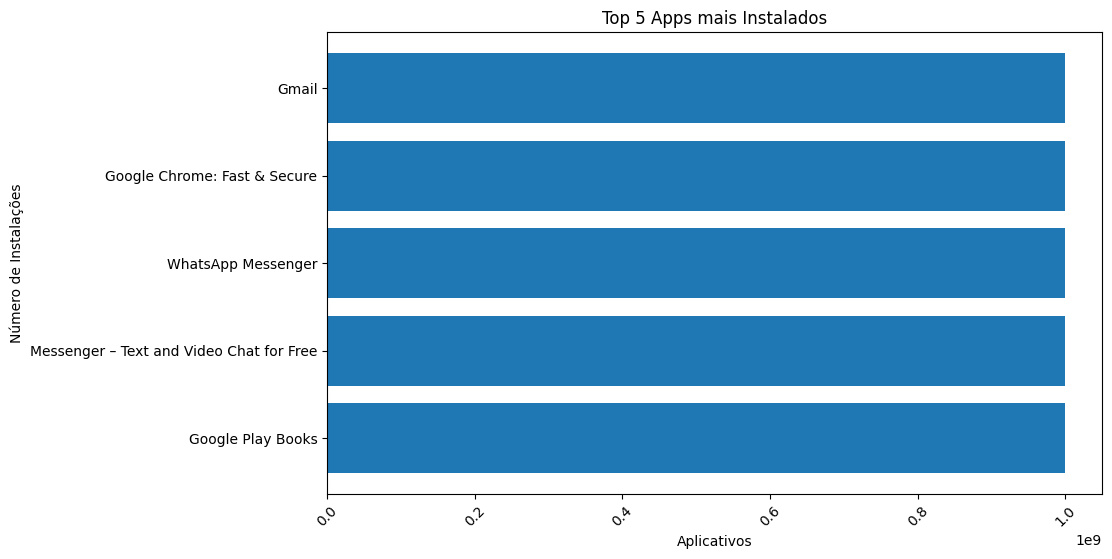

In [2]:
# Tratando a coluna 'Installs' para converter em valores numéricos
df['Installs'] = pd.to_numeric(df['Installs'].astype(str).str.replace(',', '').str.replace('+', ''), errors='coerce')
df = df.dropna(subset=['Installs'])  # Removendo linhas onde 'Installs' é NaN

# Selecionando os top 5 apps por número de instalações
top_5_installs = df.nlargest(5, 'Installs')[['App', 'Installs']]

# Criando o gráfico de barras para os top 5 aplicativos por número de instalações
plt.figure(figsize=(10, 6))
plt.barh(top_5_installs['App'], top_5_installs['Installs'])
plt.title('Top 5 Apps mais Instalados')
plt.xlabel('Aplicativos')
plt.ylabel('Número de Instalações')
plt.xticks(rotation=45)
plt.show()


## 3. Gráfico de Pizza das Categorias de Apps

### Vamos agora criar um gráfico de pizza que representa as diferentes categorias de aplicativos no dataset e a frequência em que cada uma delas aparece. Esse gráfico ajudará a entender a diversidade de categorias presentes na loja e a proporção que cada categoria ocupa no total.

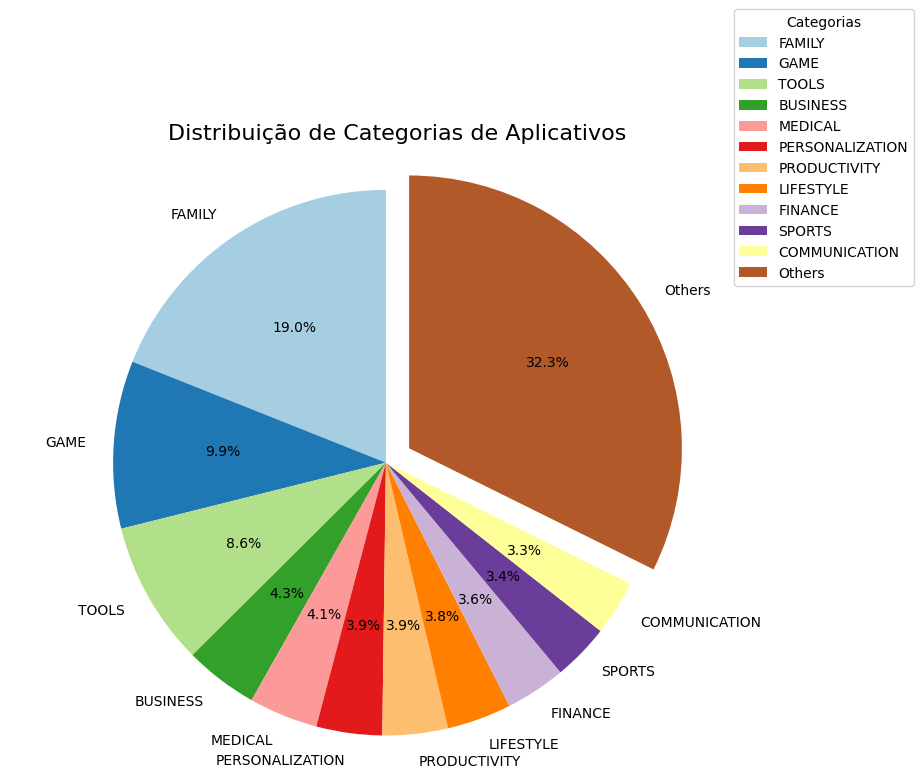

In [3]:
# Calculando a frequência das categorias
category_counts = df['Category'].value_counts()

# Para melhorar a visualização, agrupamos categorias com menos de 3% em "Outros"
threshold = 0.03 * category_counts.sum()  # Calculando o limiar de 3%
small_categories = category_counts[category_counts < threshold]
category_counts = category_counts[category_counts >= threshold]
category_counts['Others'] = small_categories.sum()

# Criar gráfico de pizza
plt.figure(figsize=(10,8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors, explode=[0.1 if x == 'Others' else 0 for x in category_counts.index])
plt.title('Distribuição de Categorias de Aplicativos', fontsize=16)
plt.axis('equal')  # Garantir que o gráfico de pizza seja desenhado como um círculo.

# Adicionar legenda para facilitar a leitura
plt.legend(category_counts.index, title="Categorias", bbox_to_anchor=(1.05, 1), loc = 'center')

plt.show()

## 4. Aplicativo Mais Caro no Dataset

### Nesta etapa, vamos identificar qual é o aplicativo mais caro do dataset. Essa informação é útil para conhecer o valor máximo cobrado por um app e avaliar a presença de aplicativos premium na loja.

In [4]:
# Convertendo a coluna de Preço para string, substituindo o símbolo '$' e convertendo para float
df['Price'] = df['Price'].astype(str).str.replace('$', '').astype(float)

# Encontrando o app mais caro
most_expensive_app = df.loc[df['Price'].idxmax()]

# Exibindo o resultado
print(f"O App mais caro do dataset é {most_expensive_app['App']} com valor de $ {most_expensive_app['Price']}")

O App mais caro do dataset é I'm Rich - Trump Edition com valor de $ 400.0


## 5. Contagem de Apps Classificados como "Mature 17+"

### Agora, vamos contar quantos aplicativos são classificados como "Mature 17+", uma classificação importante para indicar apps com conteúdo destinado ao público adulto.

In [5]:
# Contando o número de apps com a classificação "Mature 17+"
mature_apps_count = df[df['Content Rating'] == 'Mature 17+'].shape[0]
print(f'Existem {mature_apps_count} apps registrado na categoria Mature 17+ ')

Existem 393 apps registrado na categoria Mature 17+ 


## 6. Top 10 Apps por Número de Avaliações

### Vamos identificar os 10 aplicativos com o maior número de avaliações, ordenando-os em ordem decrescente. Isso nos ajudará a observar quais aplicativos têm a maior interação dos usuários por meio de avaliações.

In [6]:
# Convertendo a coluna de Reviews para numérico
df['Reviews'] = df['Reviews'].astype(int)

# Selecionando os top 10 apps por número de avaliações
top_10_reviews = df.nlargest(10, 'Reviews')[['App', 'Reviews']]
top_10_reviews

,App,Reviews
2544,Facebook,78158306
336,WhatsApp Messenger,69119316
2545,Instagram,66577313
335,Messenger – Text and Video Chat for Free,56642847
1670,Clash of Clans,44891723
4005,Clean Master- Space Cleaner & Antivirus,42916526
1654,Subway Surfers,27722264
3665,YouTube,25655305
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999
1660,Clash Royale,23133508


## 7. Análises Adicionais

### Para enriquecer nossa análise, vamos calcular duas métricas adicionais:

-  Lista da quatidade de apps para cada faixa etária



In [7]:
# Contar a quantidade de aplicativos para cada "Content Rating"
content_rating_counts = df['Content Rating'].value_counts()

# Converter o resultado em uma lista de listas [Content Rating, Count]
content_rating_list = content_rating_counts.reset_index()

# Exibir a lista
print(content_rating_list)

    Content Rating  count
0         Everyone   7903
1             Teen   1036
2       Mature 17+    393
3     Everyone 10+    322
4  Adults only 18+      3
5          Unrated      2


- A média de avaliação dos aplicativos pagos, representada como um único valor numérico.

In [75]:
# Média de avaliação dos aplicativos pagos
paid_apps_mean_rating = df[df['Type'] == 'Paid']['Rating'].mean()
print(f'A média de Avaliação dos Apps pagos é {paid_apps_mean_rating:.2f}')

A média de Avaliação dos Apps pagos é 4.26


## 8. Gráficos para os Indicadores

### Para uma análise visual mais rica, vamos criar quatro gráficos adicionais, usando diferentes tipos de visualizações:

- Um gráfico de colunas para observar a distribuição dos apps por faixa etária em uma escala logarítimica para poder ver os valores menores 

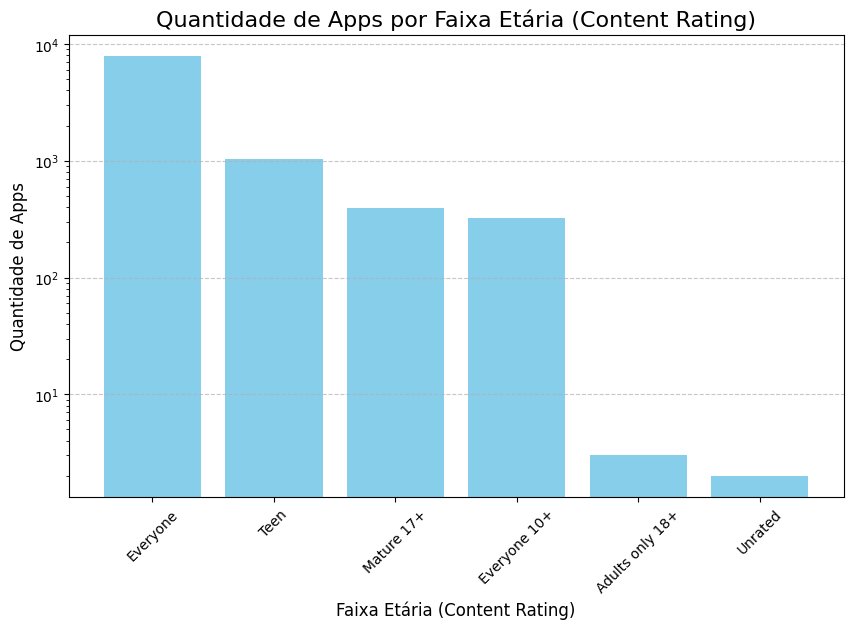

In [130]:
# Contar a quantidade de aplicativos para cada faixa etária (Content Rating)
content_rating_counts = df['Content Rating'].value_counts()

# Criar o histograma usando matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(content_rating_counts.index, content_rating_counts.values, color='skyblue')
plt.title('Quantidade de Apps por Faixa Etária (Content Rating)', fontsize=16)
plt.xlabel('Faixa Etária (Content Rating)', fontsize=12)
plt.ylabel('Quantidade de Apps', fontsize=12)
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor visualização
plt.yscale('log')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


- Um histograma para observar a concentração das avaliações recebidas pelos os apps

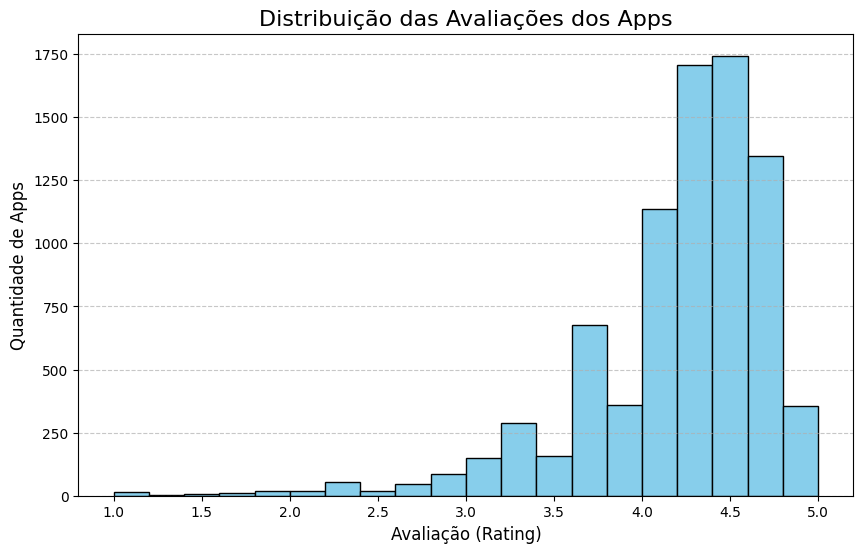

In [147]:
# Filtrar os dados para remover valores nulos em 'Rating'
ratings_data = df['Rating'].dropna()

# Criar o histograma
plt.figure(figsize=(10,6))
plt.hist(ratings_data, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuição das Avaliações dos Apps', fontsize=16)
plt.xlabel('Avaliação (Rating)', fontsize=12)
plt.ylabel('Quantidade de Apps', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()